## 初始準備

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%env KERAS_BACKEND = tensorflow

## 讓資料庫進來

In [4]:
from keras.datasets import imdb

In [15]:
(x_train , y_train) , (x_test , y_test) = imdb.load_data(num_words = 20000)

In [18]:
print('訓練資料總比數:%d'%x_train.shape)
print('測試資料總比數:%d'%x_test.shape)

訓練資料總比數:25000
測試資料總比數:25000


## 處理一下輸入 把他們弄成一樣的長度

In [21]:
from keras.preprocessing import sequence

In [22]:
x_train = sequence.pad_sequences(x_train , maxlen=200)
x_test = sequence.pad_sequences(x_test , maxlen=200)

In [24]:
print('調整過後的訓練資料有%d筆 長度有%d'%x_train.shape)
print('調整過後的訓練資料有%d筆 長度有%d'%x_test.shape)

調整過後的訓練資料有25000筆 長度有200
調整過後的訓練資料有25000筆 長度有200


## 寫神經網路的架構

In [47]:
from keras.models import Sequential
from keras.layers import Dense,Embedding
from keras.layers import LSTM
from keras.utils import plot_model

In [48]:
def model(N,K):
    model = Sequential()
    model.add(Embedding(20000,N))
    model.add(LSTM(K)) 
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model
    

In [49]:
model = model(5,16)

In [ ]:
model.summary()

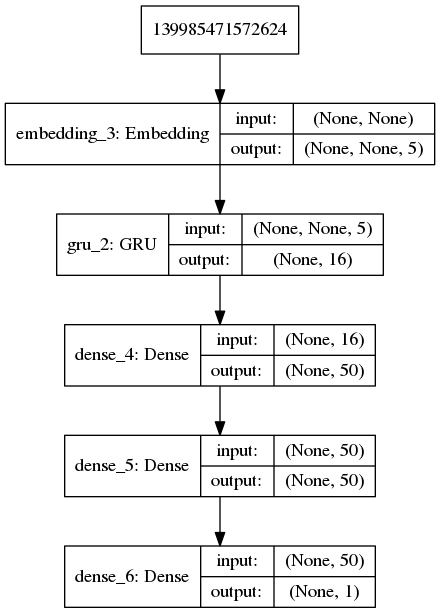

In [51]:
from IPython.display import Image
img = 'model.png'
Image(filename=img)

In [53]:
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
25000/25000 [==============================] - 117s 5ms/step - loss: 0.3331 - acc: 0.8597
Epoch 2/10
25000/25000 [==============================] - 112s 4ms/step - loss: 0.1929 - acc: 0.9266
Epoch 3/10
25000/25000 [==============================] - 133s 5ms/step - loss: 0.1385 - acc: 0.9490
Epoch 4/10
25000/25000 [==============================] - 134s 5ms/step - loss: 0.0980 - acc: 0.9668
Epoch 5/10
25000/25000 [==============================] - 124s 5ms/step - loss: 0.0750 - acc: 0.9743
Epoch 6/10
25000/25000 [==============================] - 115s 5ms/step - loss: 0.0615 - acc: 0.9794
Epoch 7/10
25000/25000 [==============================] - 123s 5ms/step - loss: 0.0484 - acc: 0.9840
Epoch 8/10
25000/25000 [==============================] - 114s 5ms/step - loss: 0.0383 - acc: 0.9876
Epoch 9/10
25000/25000 [==============================] - 112s 4ms/step - loss: 0.0326 - acc: 0.9896
Epoch 10/10
25000/25000 [==============================] - 117s 5ms/step - loss: 0.0280 - a

In [ ]:
Y_preds = model.predict(x_test)